In [216]:
martini2 = [10000,40000,28000,18000,20000,11000,60000,60000,60000,60000,40000,40000,60000,60000,
            60000,60000,40000,40000,60000,60000,60000,60000,60000,60000]
K_boltzmann = [7538.791985,37041.7569,5473.820313,26750.24489,142.9286624,10977.80691,19801.40344,
               36879.00546,24319.37415,44571.1832,31810.476,32666.67403,53086.62883,1894.948061,
               40100.78068,72650.62202,50198.40179,53081.87911,182.5401798,36863.21938,40782.90211,
               84528.27601,41133.69392,46244.07767]

import numpy as np
np.corrcoef(martini2, K_boltzmann)

array([[1.        , 0.45720631],
       [0.45720631, 1.        ]])

In [4]:
martini_data = [0.363,0.202,0.293,0.286,0.292,0.28,0.234,0.263,0.299,0.162,0.335,0.32,0.296,0.291,0.296,0.162,0.385,0.32,0.224,0.281,0.267,0.224,0.289,0.276,0.354]
boltzmann_dist_data = [0.407713445,0.240216956,0.343448102,0.329894573,0.525525345,0.330125308,
                       0.233217213,0.269362292,0.295848259,0.162829001,0.329688086,0.341282879,
                       0.29522389,0.245692172,0.291034438,0.162940589,0.389827467,0.339710294,
                       0.055982705,0.285937434,0.267677625,0.221067451,0.268600881,0.20968964,0.506]
gaussian_dist_data = [0.412558467,0.236942976,0.338189474,0.329147264,0.338049492,0.328881889,
                      0.231969438,0.269096832,0.294355397,0.163957088,0.328951661,0.340896505,
                      0.295066947,0.293022854,0.291067187,0.163025494,0.389928094,0.339014621,
                      0.223939049,0.285943739,0.267981535,0.221055534,0.268946216,0.209043448,
                      0.330715567]


import numpy as np
print("correlation of distance : martini2 vs boltzmann")
print(np.corrcoef(martini_data, boltzmann_dist_data))

print("correlation of distance : gaussian vs boltzmann")
print(np.corrcoef(gaussian_dist_data, boltzmann_dist_data))

correlation of distance : martini2 vs boltzmann
[[1.         0.74387627]
 [0.74387627 1.        ]]
correlation of distance : gaussian vs boltzmann
[[1.         0.80182305]
 [0.80182305 1.        ]]


### SIRNA parameters

In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

: 

In [219]:
distance_dict = dict.fromkeys(['BB1_BB2','BB2_BB3','BB3_ASC1','ASC2_ASC4','ASC1_ASC3','ASC1_ASC2','ASC2_ASC3','ASC3_ASC4',\
'ASC4_ASC1','BB3_USC1','USC1_USC2','USC2_USC3','USC3_USC1','BB3_GSC1','GSC2_GSC4','GSC1_GSC3','GSC1_GSC2','GSC2_GSC3',\
'GSC3_GSC4','GSC4_GSC1','BB3_CSC1','CSC1_CSC2','CSC2_CSC3','CSC3_CSC1'])

In [220]:
distance_parameters = pd.DataFrame()
distance_parameters_dict = {'Parameter':[],'raw data mean value':[],
                            'raw data mode value gaussian-fitted mode value':[],
                           'Seed value obtained using BOltzmann inversion':[],
                           'K from boltzmann inversion':[]}

In [221]:
def return_modes_of_data(data):   
    data = data
    n = np.histogram(data)
    count_dict = {}
    for i in range(0,len(n[0])):
        count_dict[n[0][i]] = n[1][i]
    return sorted(count_dict.items()),data.mean()

In [ ]:
# df_Hmapped_distance_7w0f = pd.read_csv('piRNA_simu_files/3O3I/dist_final.xvg')
df_Hmapped_distance_all = pd.read_csv('dist_final_allmolecules.csv')

In [223]:
df_Hmapped_distance_all.columns

Index(['BB1_BB2', 'BB2_BB3', 'BB3_ASC1', 'ASC2_ASC4', 'ASC1_ASC3', 'ASC1_ASC2',
       'ASC2_ASC3', 'ASC3_ASC4', 'ASC4_ASC1', 'BB3_USC1', 'USC1_USC2',
       'USC2_USC3', 'USC3_USC1', 'BB3_GSC1', 'GSC2_GSC4', 'GSC1_GSC3',
       'GSC1_GSC2', 'GSC2_GSC3', 'GSC3_GSC4', 'GSC4_GSC1', 'BB3_CSC1',
       'CSC1_CSC2', 'CSC2_CSC3', 'CSC3_CSC1', 'BB3_pBB1'],
      dtype='object')

In [224]:
# 1rpu  1si3  2f8s  3cz3  4ngd  4nh3  5n8l  6bjv  6ra4  7w0f
BB1_BB2_Hmapped_distance_all = df_Hmapped_distance_all['BB1_BB2']
BB2_BB3_Hmapped_distance_all = df_Hmapped_distance_all['BB2_BB3']
BB3_ASC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_ASC1']
BB3_USC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_USC1']
BB3_GSC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_GSC1']
BB3_CSC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_CSC1']
ASC1_ASC2_Hmapped_distance_all = df_Hmapped_distance_all['ASC1_ASC2']
ASC2_ASC3_Hmapped_distance_all = df_Hmapped_distance_all['ASC2_ASC3']
ASC3_ASC4_Hmapped_distance_all = df_Hmapped_distance_all['ASC3_ASC4']
ASC4_ASC1_Hmapped_distance_all = df_Hmapped_distance_all['ASC4_ASC1']
ASC2_ASC4_Hmapped_distance_all = df_Hmapped_distance_all['ASC2_ASC4']
ASC1_ASC3_Hmapped_distance_all = df_Hmapped_distance_all['ASC1_ASC3']
GSC1_GSC2_Hmapped_distance_all = df_Hmapped_distance_all['GSC1_GSC2']
GSC2_GSC3_Hmapped_distance_all = df_Hmapped_distance_all['GSC2_GSC3']
GSC3_GSC4_Hmapped_distance_all = df_Hmapped_distance_all['GSC3_GSC4']
GSC4_GSC1_Hmapped_distance_all = df_Hmapped_distance_all['GSC4_GSC1']
GSC2_GSC4_Hmapped_distance_all = df_Hmapped_distance_all['GSC2_GSC4']
GSC1_GSC3_Hmapped_distance_all = df_Hmapped_distance_all['GSC1_GSC3']
CSC1_CSC2_Hmapped_distance_all = df_Hmapped_distance_all['CSC1_CSC2']
CSC2_CSC3_Hmapped_distance_all = df_Hmapped_distance_all['CSC2_CSC3']
CSC3_CSC1_Hmapped_distance_all = df_Hmapped_distance_all['CSC3_CSC1']
USC1_USC2_Hmapped_distance_all = df_Hmapped_distance_all['USC1_USC2']
USC2_USC3_Hmapped_distance_all = df_Hmapped_distance_all['USC2_USC3']
USC3_USC1_Hmapped_distance_all = df_Hmapped_distance_all['USC3_USC1']
BB3_pBB1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_pBB1']

In [225]:
def return_modes_of_data(data):   
    data = data
    n = np.histogram(data)
    count_dict = {}
    for i in range(0,len(n[0])):
        count_dict[n[0][i]] = n[1][i]
    return sorted(count_dict.items()),data.mean()

In [226]:
def P2U(p):
     boltzmann = 1.9858285706E-3 # Kcal/K
     T = 298.15 # K
     p_max = p.max()
     return - boltzmann * T * np.log(p / p_max)

In [227]:
def harmonic(r, r0, k):
     return 0.5 * k * (r - r0) ** 2

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_pBB1_Hmapped_distance_all
Mean: Raw data 0.40337205778361446
Mode: Raw data 0.3307155672506865
Mode: Gauss-fitted 0.3307155672506865


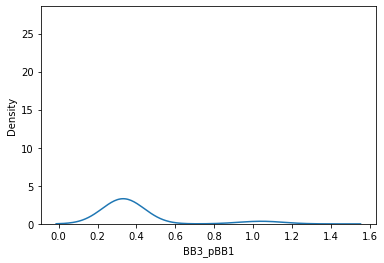

In [228]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_pBB1_Hmapped_distance_all)
xmean = np.mean(BB3_pBB1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_pBB1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_pBB1_Hmapped_distance_all,bw=0.5)

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
# 
print("BB3_pBB1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.5061151170990976
parameter K is:  11.228791147836104


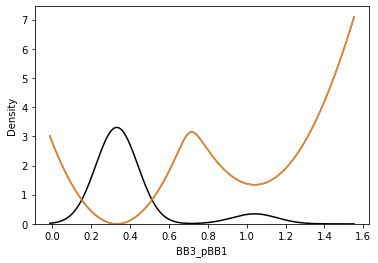

In [229]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_pBB1_Hmapped_distance_all,bw=0.5,color='black')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.33, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])


distance_parameters_dict['Parameter'].append('BB3_pBB1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB1_BB2_Hmapped_distance_all
Mean: Raw data 0.40848348318011923
Mode: Raw data 0.41255846722847317
Mode: Gauss-fitted 0.41255846722847317


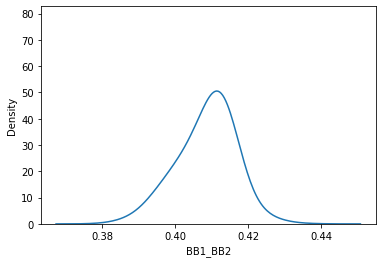

In [230]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_Hmapped_distance_all)
xmean = np.mean(BB1_BB2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB1_BB2_Hmapped_distance_all, kde=True, 
            norm_hist=False,color='white',
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_Hmapped_distance_all,bw=0.5)
# 
# 
# 

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
# 
print("BB1_BB2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.4077134448425388
parameter K is:  7538.791984633255


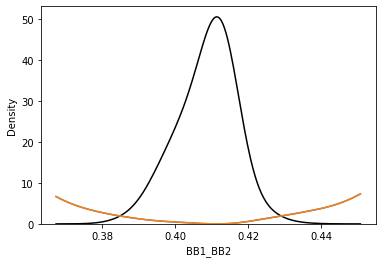

In [231]:
#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_Hmapped_distance_all,bw=0.5,color='black')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.41, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])


distance_parameters_dict['Parameter'].append('BB1_BB2')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_Hmapped_distance_all
Mean: Raw data 0.23956056167289627
Mode: Raw data 0.23694297576581141
Mode: Gauss-fitted 0.23694297576581141


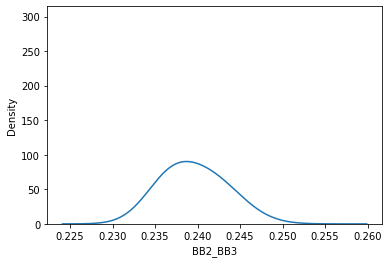

In [232]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_Hmapped_distance_all)
xmean = np.mean(BB2_BB3_Hmapped_distance_all)
xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_Hmapped_distance_all,bw=0.8)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.24021695578244845
parameter K is:  37041.75690151011


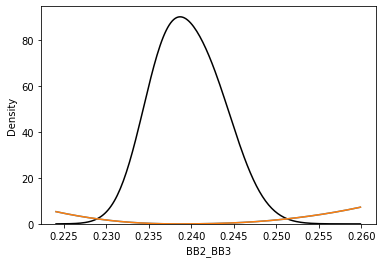

In [233]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_Hmapped_distance_all,bw=0.8,color='black')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.24, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('BB2_BB3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_ASC1_Hmapped_distance_all
Mean: Raw data 0.3412741691079907
Mode: Raw data 0.33818947360581564
Mode: Gauss-fitted 0.33818947360581564


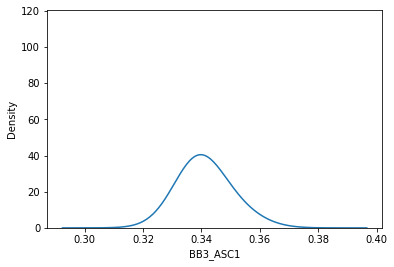

In [234]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_ASC1_Hmapped_distance_all)
xmean = np.mean(BB3_ASC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_ASC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_ASC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_ASC1_Hmapped_distance_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_ASC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.3434481018307163
parameter K is:  5473.820313423196


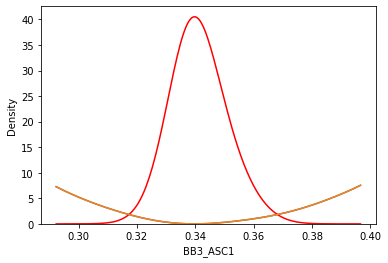

In [235]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_ASC1_Hmapped_distance_all,bw=1,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 20000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('BB3_ASC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_USC1_Hmapped_distance_all
Mean: Raw data 0.3291509243357915
Mode: Raw data 0.3291472638688377
Mode: Gauss-fitted 0.3291472638688377


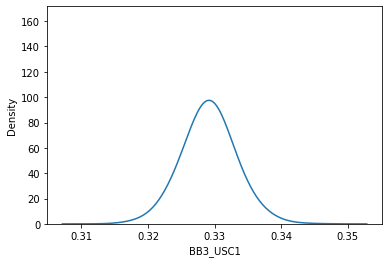

In [236]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_USC1_Hmapped_distance_all)
xmean = np.mean(BB3_USC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_USC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_USC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_USC1_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_USC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.32989457326252075
parameter K is:  26750.244885778728


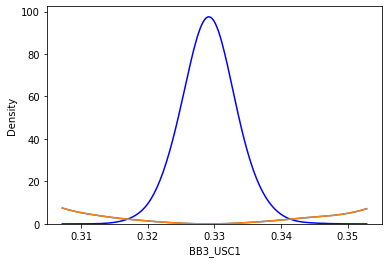

In [237]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_USC1_Hmapped_distance_all,bw=0.5,color='blue')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.33, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('BB3_USC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_GSC1_Hmapped_distance_all
Mean: Raw data 0.3418673603394282
Mode: Raw data 0.3380494924936147
Mode: Gauss-fitted 0.3380494924936147


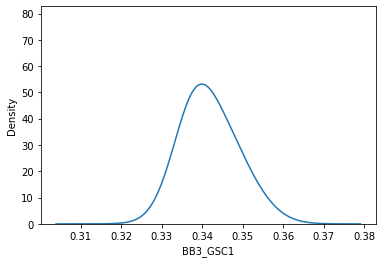

In [238]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_GSC1_Hmapped_distance_all)
xmean = np.mean(BB3_GSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_GSC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_GSC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_GSC1_Hmapped_distance_all,bw=0.7)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_GSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.3430314188996393
parameter K is:  10315.24799094243


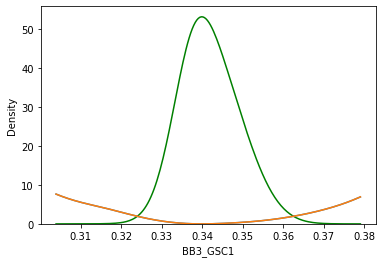

In [239]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_GSC1_Hmapped_distance_all,bw=0.7,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('BB3_GSC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_CSC1_Hmapped_distance_all
Mean: Raw data 0.3292387109809072
Mode: Raw data 0.3288818891289625
Mode: Gauss-fitted 0.3288818891289625


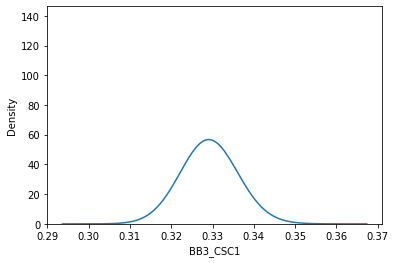

In [240]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_CSC1_Hmapped_distance_all)
xmean = np.mean(BB3_CSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_CSC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_CSC1_Hmapped_distance_all,bins=10)
# 
# 
# 

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_CSC1_Hmapped_distance_all,bw=1.4)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_CSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.33012530760425485
parameter K is:  10977.806910271296


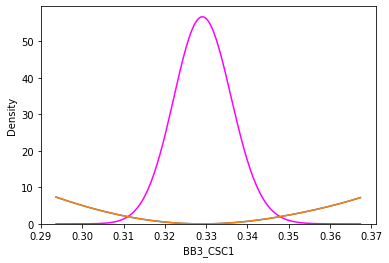

In [241]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_CSC1_Hmapped_distance_all,bw=1.4,color='magenta')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.33, 800])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('BB3_CSC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_ASC2_Hmapped_distance_all
Mean: Raw data 0.23218527123951915
Mode: Raw data 0.23196943787736504
Mode: Gauss-fitted 0.23196943787736504


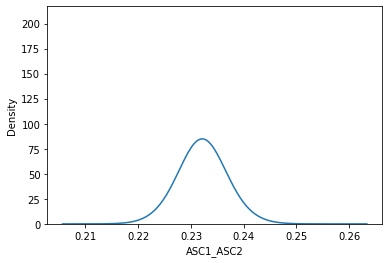

In [242]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_ASC2_Hmapped_distance_all)
xmean = np.mean(ASC1_ASC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC1_ASC2_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_ASC2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_ASC2_Hmapped_distance_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_ASC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.23321721294991168
parameter K is:  19801.403444548614


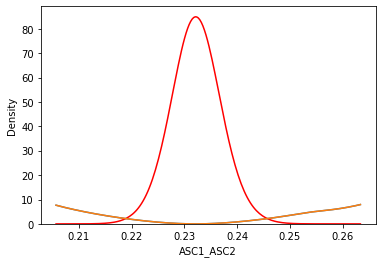

In [243]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_ASC2_Hmapped_distance_all,bw=1,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.232, 10000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC1_ASC2')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC2_ASC3_Hmapped_distance_all
Mean: Raw data 0.2690433377108799
Mode: Raw data 0.269096832278094
Mode: Gauss-fitted 0.269096832278094


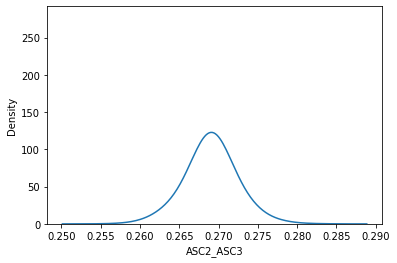

In [244]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC3_Hmapped_distance_all)
xmean = np.mean(ASC2_ASC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC2_ASC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC3_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC2_ASC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.2693622923319168
parameter K is:  36879.005463668655


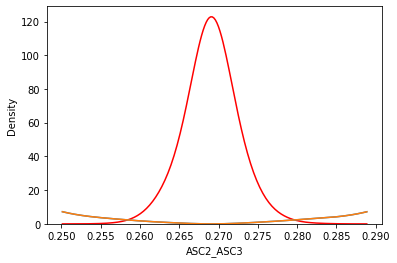

In [245]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC3_Hmapped_distance_all,bw=0.5,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.27, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC2_ASC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC3_ASC4_Hmapped_distance_all
Mean: Raw data 0.2945725830892009
Mode: Raw data 0.29435539686508283
Mode: Gauss-fitted 0.29435539686508283


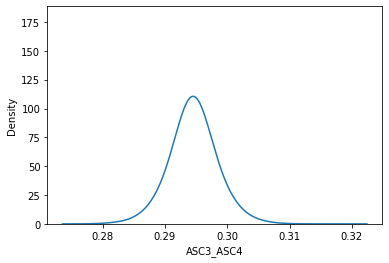

In [246]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC3_ASC4_Hmapped_distance_all)
xmean = np.mean(ASC3_ASC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC3_ASC4_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC3_ASC4_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC3_ASC4_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC3_ASC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.29584825894236316
parameter K is:  24319.374152880155


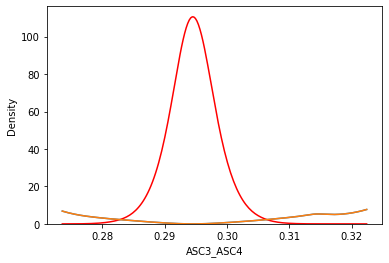

In [247]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC3_ASC4_Hmapped_distance_all,bw=0.5,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.294, 5000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC3_ASC4')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC4_ASC1_Hmapped_distance_all
Mean: Raw data 0.16340630366703704
Mode: Raw data 0.16395708806608483
Mode: Gauss-fitted 0.16395708806608483


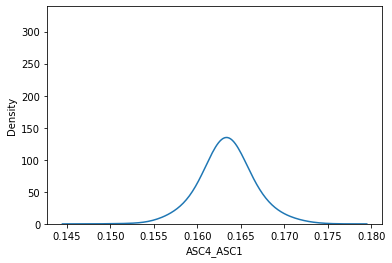

In [248]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC4_ASC1_Hmapped_distance_all)
xmean = np.mean(ASC4_ASC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(ASC4_ASC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC4_ASC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC4_ASC1_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC4_ASC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.16282900082672405
parameter K is:  44571.18319877101


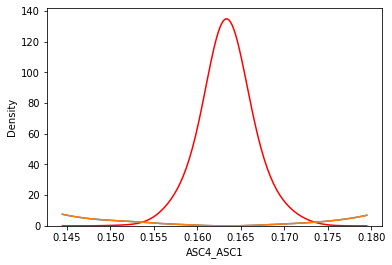

In [249]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC4_ASC1_Hmapped_distance_all,bw=0.5,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.163, 8000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC4_ASC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC2_ASC4_Hmapped_distance_all
Mean: Raw data 0.3289578745327811
Mode: Raw data 0.3289516611339244
Mode: Gauss-fitted 0.3289516611339244


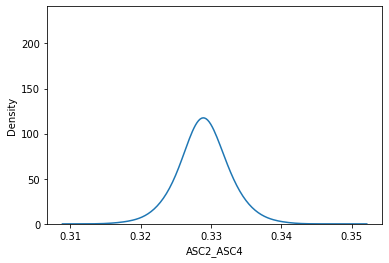

In [250]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC4_Hmapped_distance_all)
xmean = np.mean(ASC2_ASC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC2_ASC4_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC4_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC4_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC2_ASC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.3296880864790602
parameter K is:  31810.476003628348


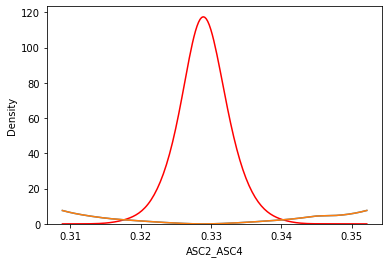

In [251]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC4_Hmapped_distance_all,bw=0.5,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.33, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC2_ASC4')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_ASC3_Hmapped_distance_all
Mean: Raw data 0.34110304071118297
Mode: Raw data 0.3408965046137325
Mode: Gauss-fitted 0.3408965046137325


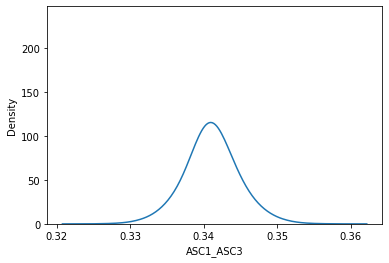

In [252]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_ASC3_Hmapped_distance_all)
xmean = np.mean(ASC1_ASC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC1_ASC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_ASC3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_ASC3_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_ASC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.34128287896369575
parameter K is:  32666.67402703624


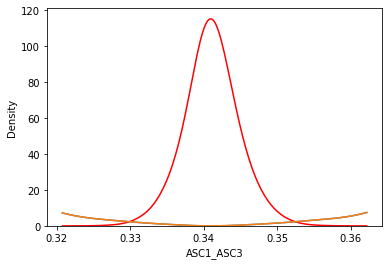

In [253]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_ASC3_Hmapped_distance_all,bw=0.5,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC1_ASC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_GSC2_Hmapped_distance_all
Mean: Raw data 0.2956170320234367
Mode: Raw data 0.29506694718570176
Mode: Gauss-fitted 0.29506694718570176


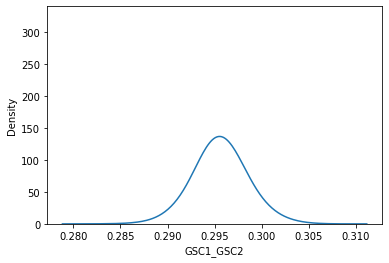

In [254]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_GSC2_Hmapped_distance_all)
xmean = np.mean(GSC1_GSC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC1_GSC2_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_GSC2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_GSC2_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_GSC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.2952238899573171
parameter K is:  53086.62882829605


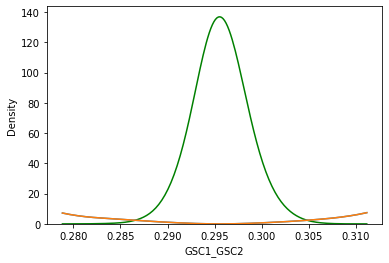

In [255]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_GSC2_Hmapped_distance_all,bw=0.5,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.295, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC1_GSC2')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC3_Hmapped_distance_all
Mean: Raw data 0.29303475098494797
Mode: Raw data 0.2930228537455696
Mode: Gauss-fitted 0.2930228537455696


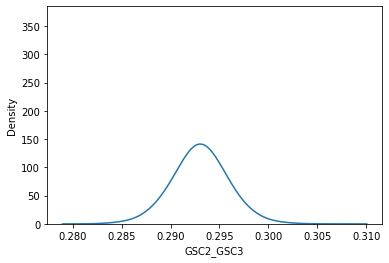

In [256]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC3_Hmapped_distance_all)
xmean = np.mean(GSC2_GSC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC2_GSC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC3_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC2_GSC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.24569217152581152
parameter K is:  1894.9480607491657


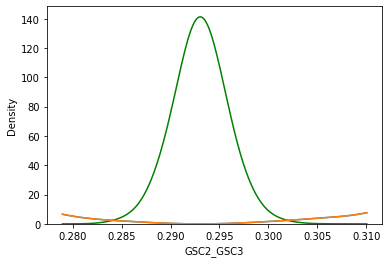

In [257]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC3_Hmapped_distance_all,bw=0.5,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.29, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC2_GSC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC3_GSC4_Hmapped_distance_all
Mean: Raw data 0.2909825234872209
Mode: Raw data 0.29106718722392644
Mode: Gauss-fitted 0.29106718722392644


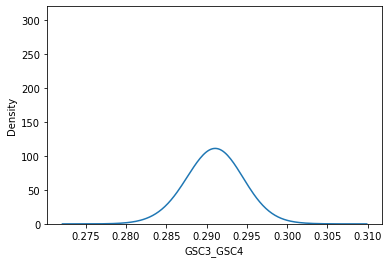

In [258]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC3_GSC4_Hmapped_distance_all)
xmean = np.mean(GSC3_GSC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC3_GSC4_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC3_GSC4_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC3_GSC4_Hmapped_distance_all,bw=0.8)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC3_GSC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.29103443770151366
parameter K is:  40100.780681559554


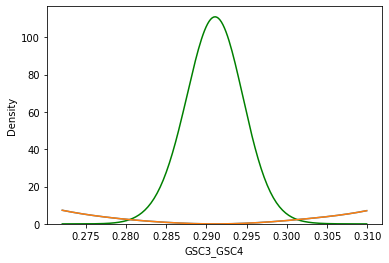

In [259]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC3_GSC4_Hmapped_distance_all,bw=0.8,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.29, 100000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC3_GSC4')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC4_GSC1_Hmapped_distance_all
Mean: Raw data 0.16330922315385393
Mode: Raw data 0.16302549415245335
Mode: Gauss-fitted 0.16302549415245335


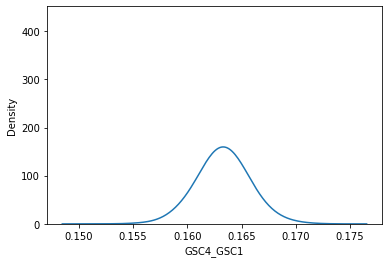

In [260]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC4_GSC1_Hmapped_distance_all)
xmean = np.mean(GSC4_GSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC4_GSC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC4_GSC1_Hmapped_distance_all,bins=10)
# 
# 
# 

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC4_GSC1_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC4_GSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.1629405885006606
parameter K is:  72650.6220161453


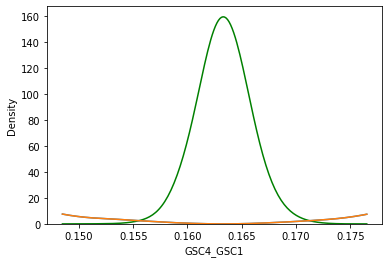

In [261]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC4_GSC1_Hmapped_distance_all,bw=0.5,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.163, 200000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC4_GSC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC2_GSC4_Hmapped_distance_all
Mean: Raw data 0.38977603798363475
Mode: Raw data 0.3899280938380665
Mode: Gauss-fitted 0.3899280938380665


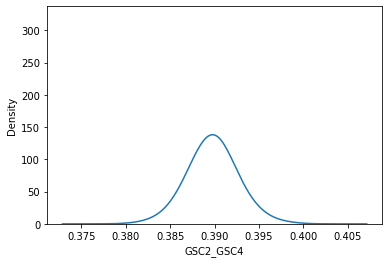

In [262]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC4_Hmapped_distance_all)
xmean = np.mean(GSC2_GSC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC2_GSC4_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC4_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC4_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC2_GSC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.3898274671455962
parameter K is:  50198.401789109186


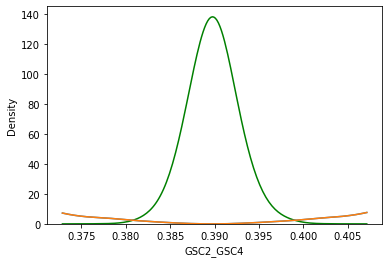

In [263]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC4_Hmapped_distance_all,bw=0.5,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.39, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC2_GSC4')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_GSC3_Hmapped_distance_all
Mean: Raw data 0.33964794423679157
Mode: Raw data 0.33901462105592706
Mode: Gauss-fitted 0.33901462105592706


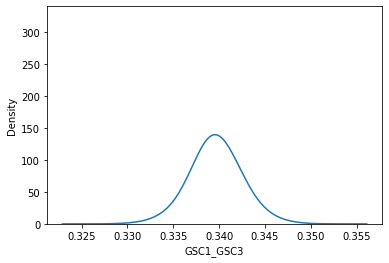

In [264]:


# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_GSC3_Hmapped_distance_all)
xmean = np.mean(GSC1_GSC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC1_GSC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_GSC3_Hmapped_distance_all,bins=10)
# 
# 
# 

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_GSC3_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_GSC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.3397102936920177
parameter K is:  53081.879114103125


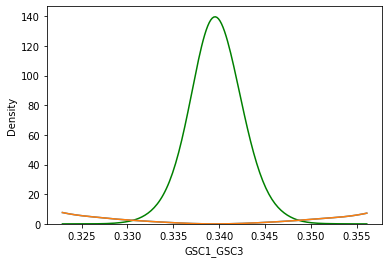

In [265]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_GSC3_Hmapped_distance_all,bw=0.5,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC1_GSC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC1_CSC2_Hmapped_distance_all
Mean: Raw data 0.22374007475502575
Mode: Raw data 0.22393904857603705
Mode: Gauss-fitted 0.22393904857603705


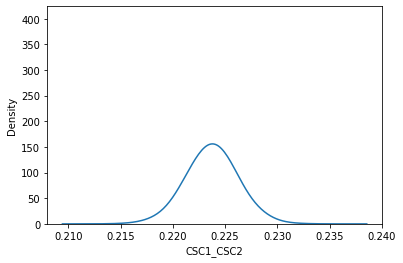

In [266]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC1_CSC2_Hmapped_distance_all)
xmean = np.mean(CSC1_CSC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC1_CSC2_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC1_CSC2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC1_CSC2_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC1_CSC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.055982704923277705
parameter K is:  182.5401798191568


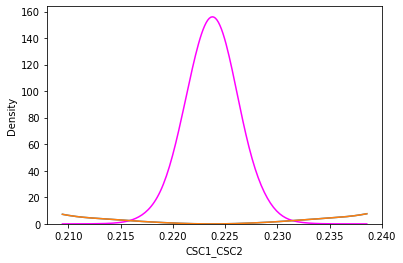

In [267]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC1_CSC2_Hmapped_distance_all,bw=0.5,color='magenta')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.22, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('CSC1_CSC2')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC2_CSC3_Hmapped_distance_all
Mean: Raw data 0.28595373270027274
Mode: Raw data 0.2859437385597234
Mode: Gauss-fitted 0.2859437385597234


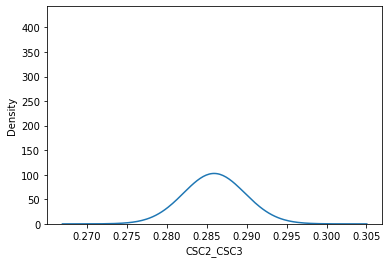

In [268]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC2_CSC3_Hmapped_distance_all)
xmean = np.mean(CSC2_CSC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC2_CSC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC2_CSC3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC2_CSC3_Hmapped_distance_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC2_CSC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.2859374337485293
parameter K is:  36863.21937607041


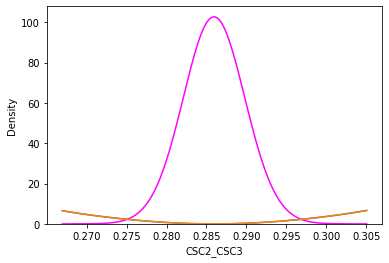

In [269]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC2_CSC3_Hmapped_distance_all,bw=1.2,color='magenta')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.28, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('CSC2_CSC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC3_CSC1_Hmapped_distance_all
Mean: Raw data 0.2676696636023841
Mode: Raw data 0.26798153526432145
Mode: Gauss-fitted 0.26798153526432145


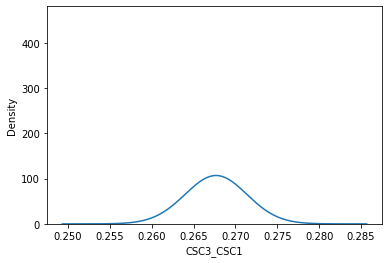

In [270]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC3_CSC1_Hmapped_distance_all)
xmean = np.mean(CSC3_CSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC3_CSC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC3_CSC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC3_CSC1_Hmapped_distance_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC3_CSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.26767762548091373
parameter K is:  40782.902114799224


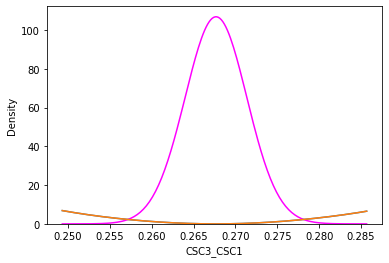

In [271]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC3_CSC1_Hmapped_distance_all,bw=1.2,color='magenta')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.267, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('CSC3_CSC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC1_USC2_Hmapped_distance_all
Mean: Raw data 0.22117718961511262
Mode: Raw data 0.2210555341164217
Mode: Gauss-fitted 0.2210555341164217


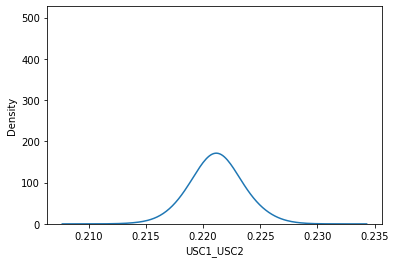

In [272]:


# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC1_USC2_Hmapped_distance_all)
xmean = np.mean(USC1_USC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(USC1_USC2_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC1_USC2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC1_USC2_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC1_USC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.2210674514925301
parameter K is:  84528.27601099384


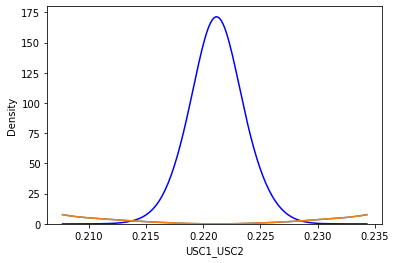

In [273]:
#get probability distribution from data
plt2 = sns.kdeplot(USC1_USC2_Hmapped_distance_all,bw=0.5,color='blue')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.22, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('USC1_USC2')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC2_USC3_Hmapped_distance_all
Mean: Raw data 0.26879462571976964
Mode: Raw data 0.2689462164863807
Mode: Gauss-fitted 0.2689462164863807


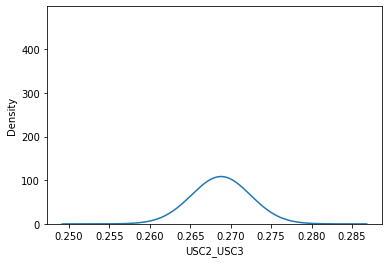

In [274]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC2_USC3_Hmapped_distance_all)
xmean = np.mean(USC2_USC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(USC2_USC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC2_USC3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC2_USC3_Hmapped_distance_all,bw=1.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC2_USC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.26860088147089267
parameter K is:  41133.69391805217


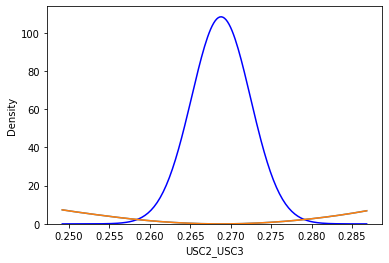

In [275]:
#get probability distribution from data
plt2 = sns.kdeplot(USC2_USC3_Hmapped_distance_all,bw=1.3,color='blue')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.27, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('USC2_USC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC3_USC1_Hmapped_distance_all
Mean: Raw data 0.20958985756136983
Mode: Raw data 0.2090434480043146
Mode: Gauss-fitted 0.2090434480043146


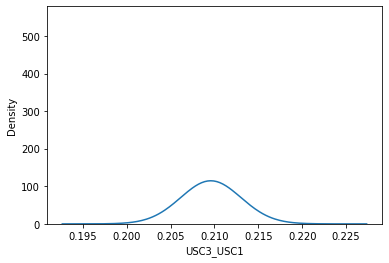

In [276]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC3_USC1_Hmapped_distance_all)
xmean = np.mean(USC3_USC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(USC3_USC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC3_USC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC3_USC1_Hmapped_distance_all,bw=1.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC3_USC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.20968964011985677
parameter K is:  46244.07766514309


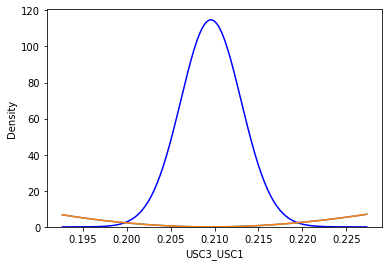

In [277]:
#get probability distribution from data
plt2 = sns.kdeplot(USC3_USC1_Hmapped_distance_all,bw=1.3,color='blue')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.21, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('USC3_USC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

In [278]:
distance_parameters['Parameter'] = distance_parameters_dict['Parameter']
distance_parameters['raw data mean value'] = distance_parameters_dict['raw data mean value']
distance_parameters['raw data mode value gaussian-fitted mode value'] = distance_parameters_dict['raw data mode value gaussian-fitted mode value']
distance_parameters['Seed value obtained using BOltzmann inversion'] = distance_parameters_dict['Seed value obtained using BOltzmann inversion']
distance_parameters['K from boltzmann inversion'] = distance_parameters_dict['K from boltzmann inversion']
distance_parameters

,Parameter,raw data mean value,raw data mode value gaussian-fitted mode value,Seed value obtained using BOltzmann inversion,K from boltzmann inversion
0,BB3_pBB1,0.403372,0.330716,0.506115,11.228791
1,BB1_BB2,0.408483,0.412558,0.407713,7538.791985
2,BB2_BB3,0.239561,0.236943,0.240217,37041.756902
3,BB3_ASC1,0.341274,0.338189,0.343448,5473.820313
4,BB3_USC1,0.329151,0.329147,0.329895,26750.244886
5,BB3_GSC1,0.341867,0.338049,0.343031,10315.247991
6,BB3_CSC1,0.329239,0.328882,0.330125,10977.806910
7,ASC1_ASC2,0.232185,0.231969,0.233217,19801.403445
8,ASC2_ASC3,0.269043,0.269097,0.269362,36879.005464
9,ASC3_ASC4,0.294573,0.294355,0.295848,24319.374153


In [279]:
distance_parameters.to_csv("sirna_parameters_distance.csv")